In [3]:
#Importando pandas
import pandas as pd

In [1]:
#Criando lista de names
names = ['target', 'rbarba', 'gbarba', 'bbarba', 'rsapato',
         'gsapato', 'bsapato', 'rcamisa', 'gcamisa', 'bcamisa', 
        'rcalça', 'gcalça', 'bcalça','rcabelo', 
        'gcabelo', 'bcabelo']

In [15]:
#Dataset de treino
dataset_train = pd.read_csv('dados_treinamento.txt', header=None, names=names)
dataset_train.head(5)

,target,rbarba,gbarba,bbarba,rsapato,gsapato,bsapato,rcamisa,gcamisa,bcamisa,rcalça,gcalça,bcalça,rcabelo,gcabelo,bcabelo
0,1,188,172,106,33,27,32,254,254,254,0,106,172,238,188,0
1,1,189,173,107,254,254,254,254,254,254,254,254,254,239,189,0
2,1,189,173,107,254,254,254,254,254,254,254,254,254,239,189,0
3,1,188,172,106,33,27,32,255,255,255,0,107,173,239,189,0
4,1,198,181,238,188,0,32,188,0,32,0,106,172,238,188,0


In [16]:
#Dataset de teste
dataset_test = pd.read_csv('dados_teste.txt', header=None, names=names)
dataset_test.head(5)

,target,rbarba,gbarba,bbarba,rsapato,gsapato,bsapato,rcamisa,gcamisa,bcamisa,rcalça,gcalça,bcalça,rcabelo,gcabelo,bcabelo
0,1,8,41,90,198,0,33,0,66,107,8,41,90,8,41,90
1,1,181,156,99,255,255,255,132,132,123,90,57,8,255,255,255
2,1,181,156,99,82,173,206,198,0,33,198,0,33,239,189,0
3,1,206,173,115,82,66,74,82,66,74,24,24,33,239,189,0
4,1,255,247,148,255,247,148,210,193,66,255,247,148,239,189,0


In [18]:
#Valores do target
dataset_train.target.value_counts()

1    61
0    24
Name: target, dtype: int64

In [125]:
#Selecionando apenas 2 columnas para melhor visualização
dataset_train1 = dataset_train.loc[dataset_train.target.isin([0,1]),['rbarba','gbarba', 'target']]

dataset_test1 = dataset_test.loc[dataset_train.target.isin([0,1]),['rbarba','gbarba', 'target']]

In [126]:
#Separando X e Y
X_train = dataset_train1.drop('target', axis=1)
y_train = dataset_train1.target

X_test = dataset_test1.drop('target', axis=1)
y_test = dataset_test1.target

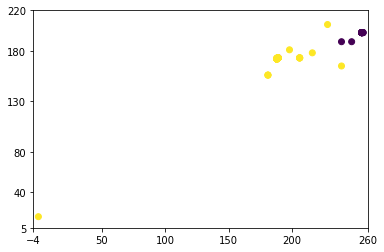

In [154]:
#Visualizando os dados de treino
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['rbarba'], 
           X_train['gbarba'], 
           c=y_train)

ax.set(xlim=(-1, 260), xticks=[-4, 50, 100, 150, 200, 260],
       ylim=(10, 220), yticks=[5, 40, 80, 130, 180, 220])

plt.show()

In [129]:
#Importando árvore de decisão
from sklearn import tree

In [130]:
# Criando o classificador
clf = tree.DecisionTreeClassifier()

In [131]:
#Fazendo o fit com os dados de treino
clf = clf.fit(X_train, y_train)

In [132]:
#Verificando o score
clf.score(X_train, y_train)

1.0

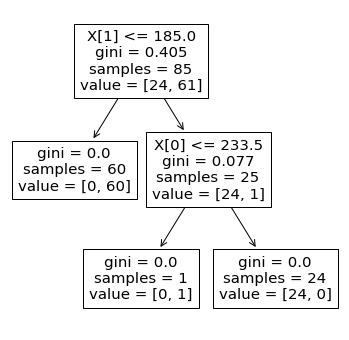

In [139]:
#Visualizando essa árvore
fig, ax = plt.subplots(figsize=(6,6))

tree.plot_tree(clf)

plt.show()

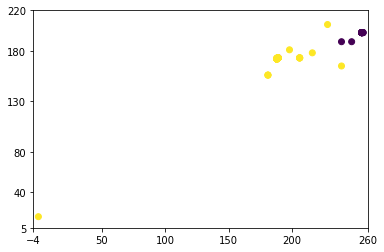

In [156]:
#Adicionando essas regras ao gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_train['rbarba'], 
           X_train['gbarba'], 
           c=y_train)

#ax.plot([0,250], [50,50], '--r')

ax.set(xlim=(-1, 260), xticks=[-4, 50, 100, 150, 200, 260],
       ylim=(10, 220), yticks=[5, 40, 80, 130, 180, 220])

plt.show()

In [135]:
#Fazendo a previsão e avaliando o erro
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 4,  6],
       [ 3, 22]], dtype=int64)

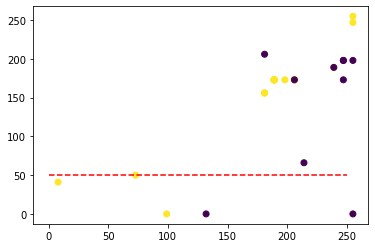

In [140]:
#Visualizando esses dados de teste no gráfico

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X_test['rbarba'], 
           X_test['gbarba'], 
           c=y_test)

ax.plot([0,250], [50,50], '--r')

plt.show()

In [173]:
#Separando X e Y para todo o dataset
X_train = dataset_train.drop('target', axis=1)
y_train = dataset_train.target

X_test = dataset_test.drop('target', axis=1)
y_test = dataset_test.target

In [175]:
#Criando o classificador e fazendo o fit
clf2 = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [176]:
#Verificando o score
clf2.score(X_train, y_train)

1.0

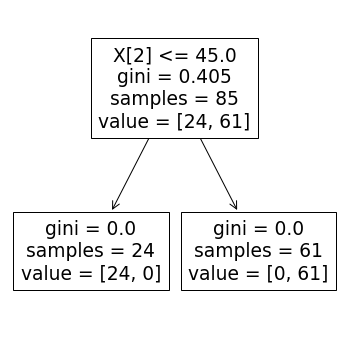

In [177]:
#Visualizando a árvore
fig, ax = plt.subplots(figsize=(6,6))

tree.plot_tree(clf2)

plt.show()

In [170]:
#Fazendo a previsão
y_pred2 = clf2.predict(X_test)

In [174]:
#Avaliando o modelo
confusion_matrix(y_test, y_pred2)

array([[ 5,  5],
       [ 3, 22]], dtype=int64)